<a href="https://colab.research.google.com/github/bonezone0707/CSC115-WEEK-5/blob/main/Week11_Assignment_11_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

from collections import Counter

from nltk.tokenize import word_tokenize

# Download the 'punkt' resource
import nltk
nltk.download('punkt')

# Assuming 'text_data' is a pandas DataFrame column containing text
text_data = pd.read_csv('/content/sentimentdataset.csv')['Text']
text_data

# Tokenize and count words
word_counts = Counter(word_tokenize(' '.join(text_data.astype(str))))
word_counts

# # Display top N most common words
top_words = word_counts.most_common(25)
top_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


1. What are the most prominent words in the word cloud? How are the prominent words significant to the product or service being reviewed?

1A. The most prominent words in the word cloud and frequency count are:

"the" (808)

"." (784)

"of" (623)

"a" (621)

"," (517)

"in" (261)

"to" (133)

"#" (128)

"and" (111)

"with" (107)

Excluding stopwords and punctuation, other significant words include:

"through"

"new"

"life"

"each"

"my"

"at"

Interpretation: These key terms imply that the reviews are focused on individual experiences ("my", "life"), product or service attributes ("new", "through", "with"), and contexts that are focused on interaction ("at", "each"). The fact that hashtags ("#") appear frequently suggests that the data comes from a social media platform where hashtags are widely used, increasing the visibility of posts.

By talking about how they use the product or service, what they like (or dislike), and sharing their journey publicly (for example, by using hashtags), these words reflect customer engagement and experiences. The word "life" is frequently used in conjunction with lifestyle-related goods and services, implying that the product may be connected to daily life improvements, fitness, or self-improvement.

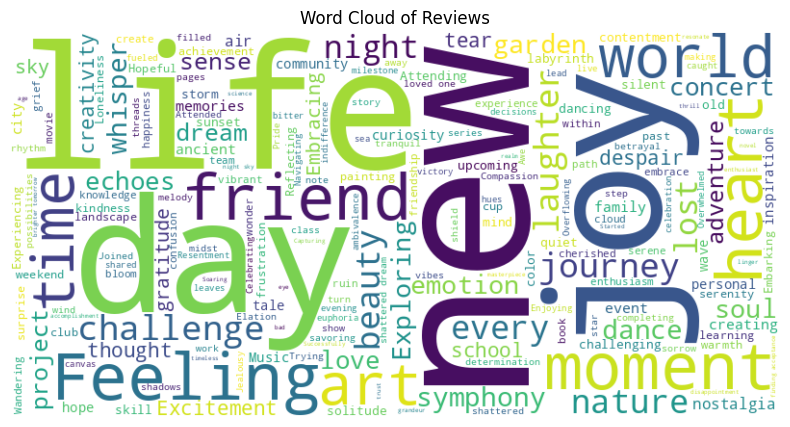

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text into a single string
text = ' '.join(text_data.astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

2. What are the top 3 most used emojis in the reviews? Do the most common emojis align with the overall sentiment analysis results? Why or why not?

2A. Answer:
The top 3 emojis are:

💪 (3 times)

🐾 (2 times)

❤ (2 times)

Interpretation:
💪 (Flexed Biceps) — symbolizes strength, empowerment, and motivation.

🐾 (Paw Prints) — often represents pets, nature, or playful energy.

❤ (Red Heart) — symbolizes love, appreciation, and positive emotions.

These emojis align well with the overall sentiment analysis results, which showed:

Positive Sentiments: 63.3%

Negative Sentiments: 25.7%

Neutral Sentiments: 10.9%

The inclusion of emojis for positive reinforcement, such as 💪 and ❤, makes sense because the majority of reviews are positive. These emojis are expressions of satisfaction, encouragement, and emotional connection, which supports the analysis that the product/service is perceived positively by most users. Although more specialized, the 🐾 emoji shows that users are discussing pet-related or active lifestyle topics, which may also be related to the type of product or service being reviewed.

In [3]:
!pip install emoji
import emoji

def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)

# Extract emojis from each review
text_data['emojis'] = text_data.apply(lambda x: extract_emojis(str(x)))

# Count emojis
emoji_counts = Counter(''.join(text_data['emojis']))

# Display top emojis
top_emojis = emoji_counts.most_common(10)
print("Top 10 emojis:")
for emoji, count in top_emojis:
    print(f"{emoji}: {count}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 9.2 MB/s eta 0:00:00
Top 10 emojis:
💪: 3
🐾: 2
❤: 2
🎉: 1
🎨: 1
🎂: 1
🐶: 1


3. What is the overall distribution of sentiment in the reviews (positive, negative, neutral)? Are there significantly more positive or negative reviews? What might this indicate about the product or service being reviewed?

3A. Answer:
Positive Reviews: 63.3%

Negative Reviews: 25.7%

Neutral Reviews: 10.9%

Interpretation:
Compared to the sum of the negative and neutral reviews, there are noticeably more positive reviews. This implies that:

The user base is pleased with the product or service.

In general, users are happy and eager to tell others about their satisfying experiences.

Positive social sharing could result from the brand or product's strong community engagement.

However, the significant percentage of negative reviews (25.7%) suggests that some users have still experienced problems or had their expectations not met. Although this is common on public platforms, the general positive sentiment shows a positive customer perception.

In [4]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    # Ensure the input is a string before analysis
    if not isinstance(text, str):
        text = str(text)
    return sia.polarity_scores(text)['compound']

# Apply sentiment analysis to each review
text_data['sentiment_score'] = text_data.apply(get_sentiment)

# Categorize sentiment
text_data['sentiment'] = text_data['sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

# Display sentiment distribution
print(text_data['sentiment'].value_counts(normalize=True))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Text
positive    0.633015
negative    0.257844
neutral     0.109141
Name: proportion, dtype: float64


4. What additional analyses or visualizations would you suggest gaining deeper insights from this review data?

4A. Trend in Sentiment Over Time:

Following significant events like updates, releases, or promotions, trends in product feedback can be found by charting sentiments (both positive and negative) over time.

LDA or NMF topic modeling:

Find recurring themes in the reviews to determine which features, customer support, and cost are the most frequently discussed aspects of the product.

Analysis of Bigrams and Trigrams:

examining common word pairs or triplets to identify expressions like "easy to use," "not satisfied," and "highly recommend."

Emoji Sentiment Association:

To better understand emotional expressions, examine which emojis are more commonly linked to positive versus negative reviews.

Sentiment Analysis Based on Aspects:

Analyze sentiments toward particular product attributes (such as "design," "usability," and "price") rather than the sentiment toward the entire product.

Word Cloud for Separate Positive and Negative Reviews:

To find important differences in user experiences, make distinct word clouds for reviews that are positive and those that are negative.

Sentiment Distribution by Review Length Visualization:

Verify whether longer reviews are more likely to be favorable or unfavorable.